## Support Vector Regression

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
dataset = pd.read_csv('Position_Salaries.csv')

dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [55]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [56]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [57]:
# y should be reshaped into a 2d array for feature scaling
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

####  Feature scaling should be done implicitly for SVR (unlike 

In [58]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
y_sc = StandardScaler()

X = x_sc.fit_transform(X)
y = y_sc.fit_transform(y)

In [59]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [60]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

### Training the SVR model

In [61]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

### Making prediction

In [62]:
y_sc.inverse_transform(regressor.predict(x_sc.transform([[6.5]])))

array([170370.0204065])

### Visualizing Results

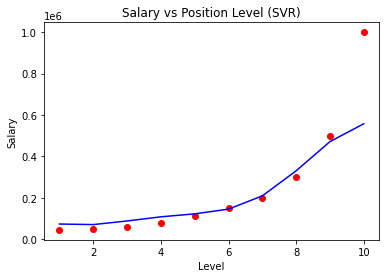

In [63]:
plt.scatter(x_sc.inverse_transform(X), y_sc.inverse_transform(y), color = 'red')
plt.plot(x_sc.inverse_transform(X), y_sc.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Salary vs Position Level (SVR)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### Higher resolution graph

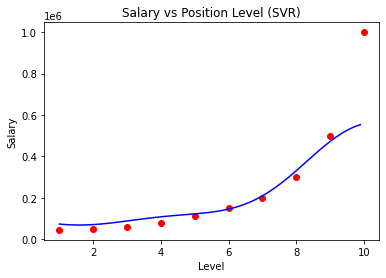

In [68]:
X_grid = np.arange(min(x_sc.inverse_transform(X)), max(x_sc.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_sc.inverse_transform(X), y_sc.inverse_transform(y), color = 'red')
plt.plot(X_grid, y_sc.inverse_transform(regressor.predict(x_sc.transform(X_grid))), color = 'blue')
plt.title('Salary vs Position Level (SVR)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()